# Supervised learning : Loan Prediction

In [35]:
# download datasets from github and unzip (google colab)
!wget https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv

--2023-07-01 15:10:10--  https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [text/plain]
Saving to: ‘lending_club_loan_two.csv.1’

lending_club_loan_t 100%[===================>]  95.70M   204MB/s    in 0.5s    

2023-07-01 15:10:10 (204 MB/s) - ‘lending_club_loan_two.csv.1’ saved [100353395/100353395]



In [36]:
# Read the data
import pandas as pd
import numpy as np

file = 'lending_club_loan_two.csv' 

df = pd.read_csv(file)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [37]:
df['loan_status'].head(10)

#แค่ 10 rows ค่า Fully Paid กับ Charged Off ก็ต่างมาก ๆ อาจจะ imbalance

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
5     Fully Paid
6     Fully Paid
7     Fully Paid
8     Fully Paid
9     Fully Paid
Name: loan_status, dtype: object

Use column 'loan_status' (Current status of the loan) for selecting target for prediction.

## Visualization

<font color='Orange'>Check a dataset, Is it imbalance?

In [38]:
count = df['loan_status'].value_counts()

ratio = count['Fully Paid']/count['Charged Off']

ratio


4.098682940017767

<font color='Orange'>Selecting and drop column that not related with target.



addr_state

issue_d

earliest_cr_line

title

zip_code

emp_title

grade

In [39]:
df.title.describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

In [40]:
# Select only the related features here.

df = df[['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies']]

df.shape

(396030, 21)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

It has 4 column that have missing value 

emp_length, revol_bal, revol_util, mort_acc, pub_rec_bankruptcies

In [43]:
df[['emp_length', 'revol_util', 'mort_acc','pub_rec_bankruptcies']].describe()

,revol_util,mort_acc,pub_rec_bankruptcies
count,395754.000000,358235.000000,395495.000000
mean,53.791749,1.813991,0.121648
std,24.452193,2.147930,0.356174
min,0.000000,0.000000,0.000000
25%,35.800000,0.000000,0.000000
50%,54.800000,1.000000,0.000000
75%,72.900000,3.000000,0.000000
max,892.300000,34.000000,8.000000


In [44]:
df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [45]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)
df['mort_acc'].fillna(df['mort_acc'].mean(), inplace = True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace = True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean(), inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [46]:
df[['emp_length', 'revol_util', 'mort_acc','pub_rec_bankruptcies']]

,emp_length,revol_util,mort_acc,pub_rec_bankruptcies
0,10+ years,41.8,0.000000,0.0
1,4 years,53.3,3.000000,0.0
2,< 1 year,92.2,0.000000,0.0
3,6 years,21.5,0.000000,0.0
4,9 years,69.8,1.000000,0.0
...,...,...,...,...
396025,2 years,34.3,0.000000,0.0
396026,5 years,95.7,1.000000,0.0
396027,10+ years,66.9,0.000000,0.0
396028,10+ years,53.8,5.000000,0.0


In [47]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
def Visualization(col, cd = None, binw = None, binr = None):
  dfmelt = pd.melt(df, id_vars = ['loan_status'], value_vars = col)

  grid = sns.FacetGrid(dfmelt, col = 'loan_status', row = 'variable', height = 4, aspect = 2, sharex = 'row', sharey = False)
  grid.map_dataframe(sns.histplot, x = "value", binwidth = binw, binrange = binr, stat = 'probability')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

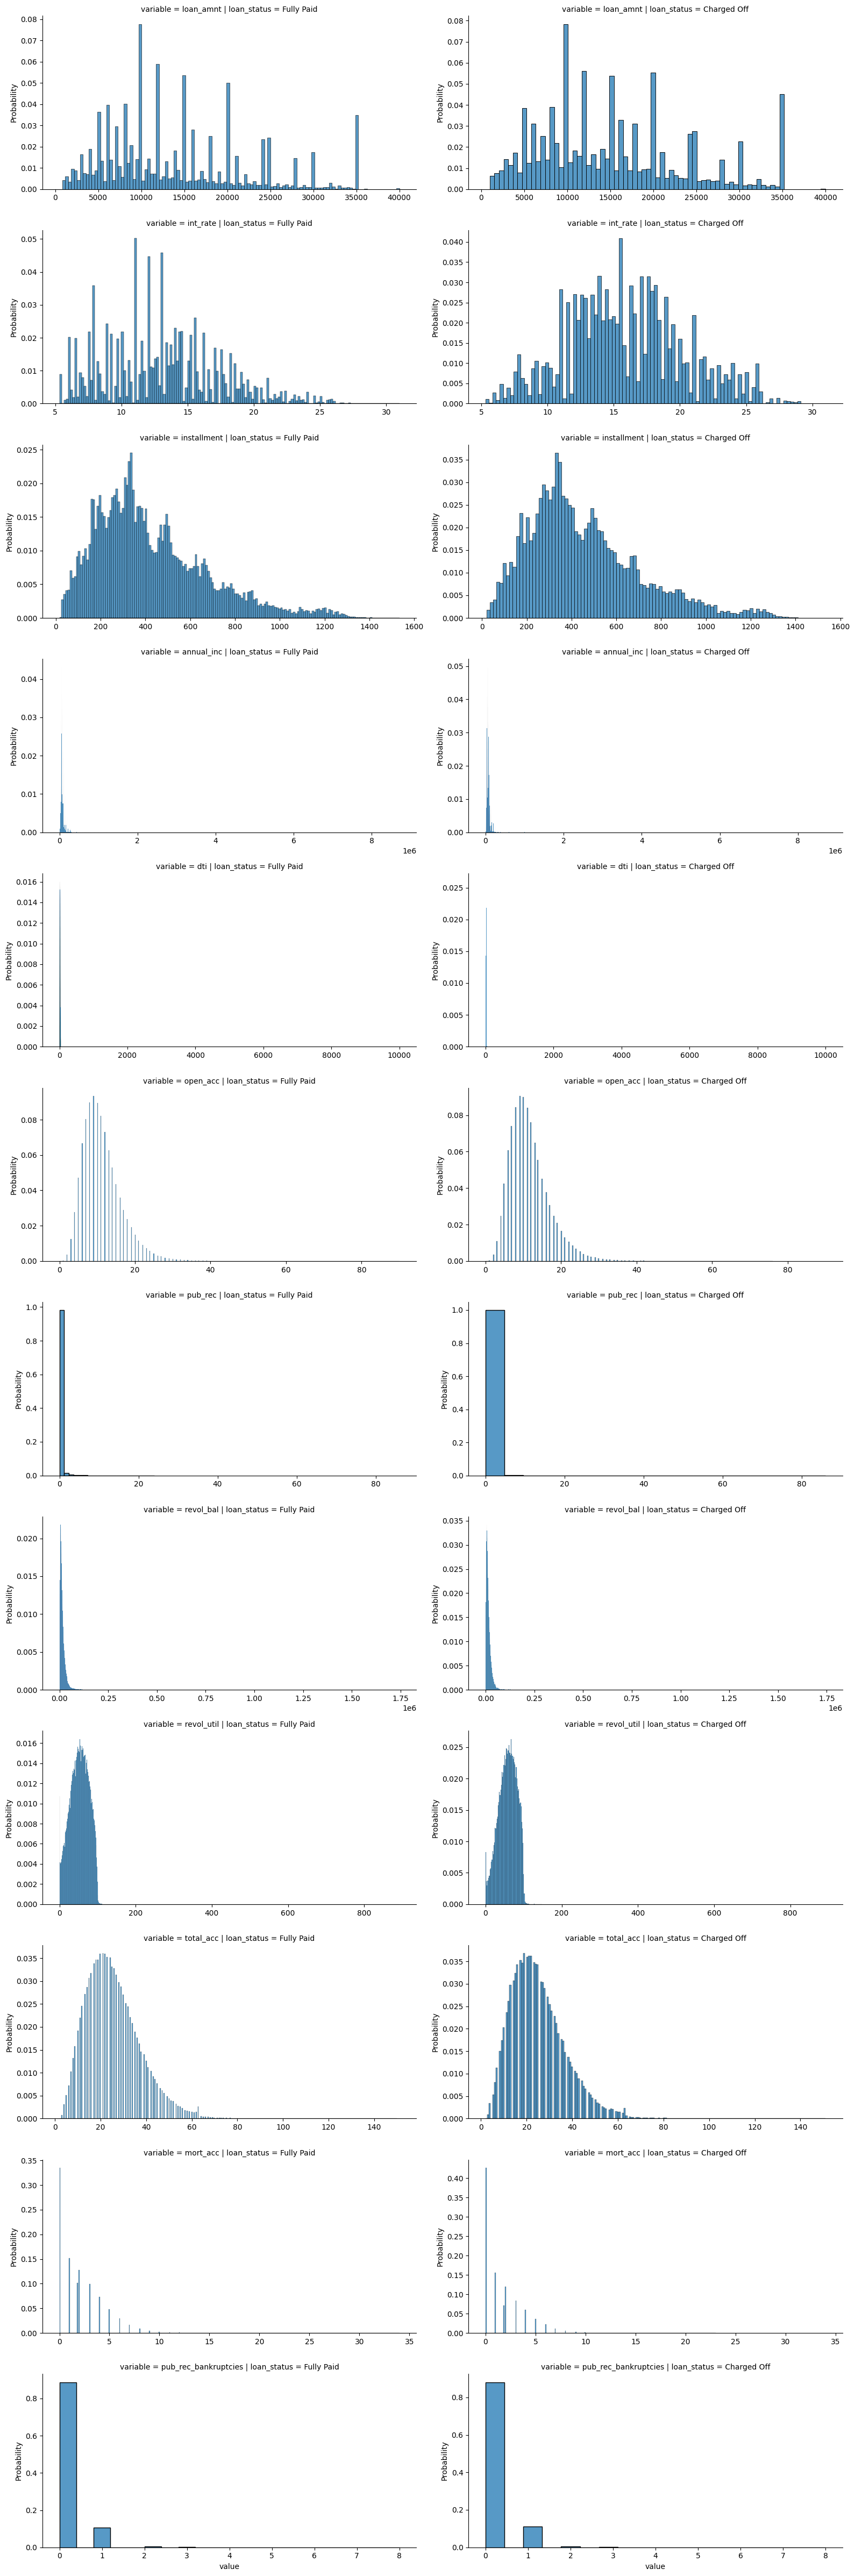

In [50]:
#for type = float64

column = ['loan_amnt','int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

Visualization(column)

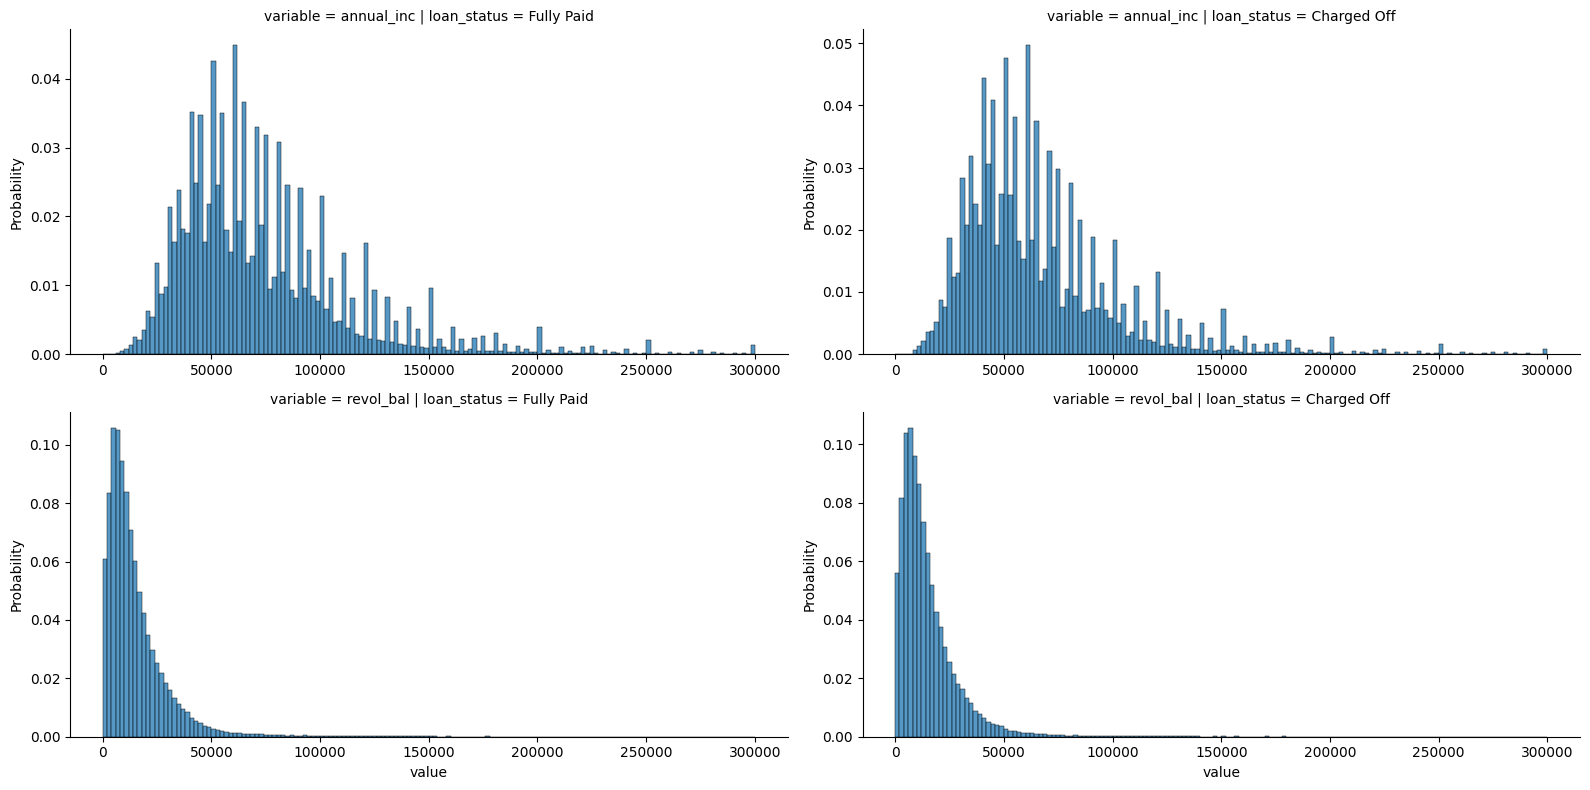

In [ ]:
Visualization(['annual_inc','revol_bal'],binw = 2000,binr =(0, 300000))

In [ ]:
df['dti'].value_counts

<bound method IndexOpsMixin.value_counts of 0         26.24
1         22.05
2         12.79
3          2.60
4         33.95
          ...  
396025    15.63
396026    21.45
396027    17.56
396028    15.88
396029     8.32
Name: dti, Length: 396030, dtype: float64>

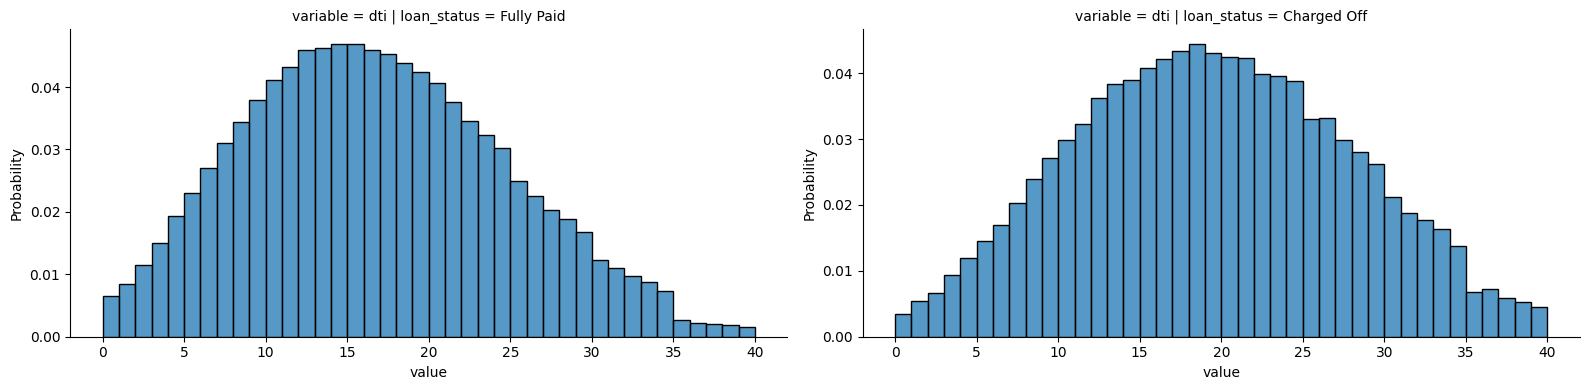

In [ ]:
Visualization(['dti'],binw = 1,binr =(0, 40))

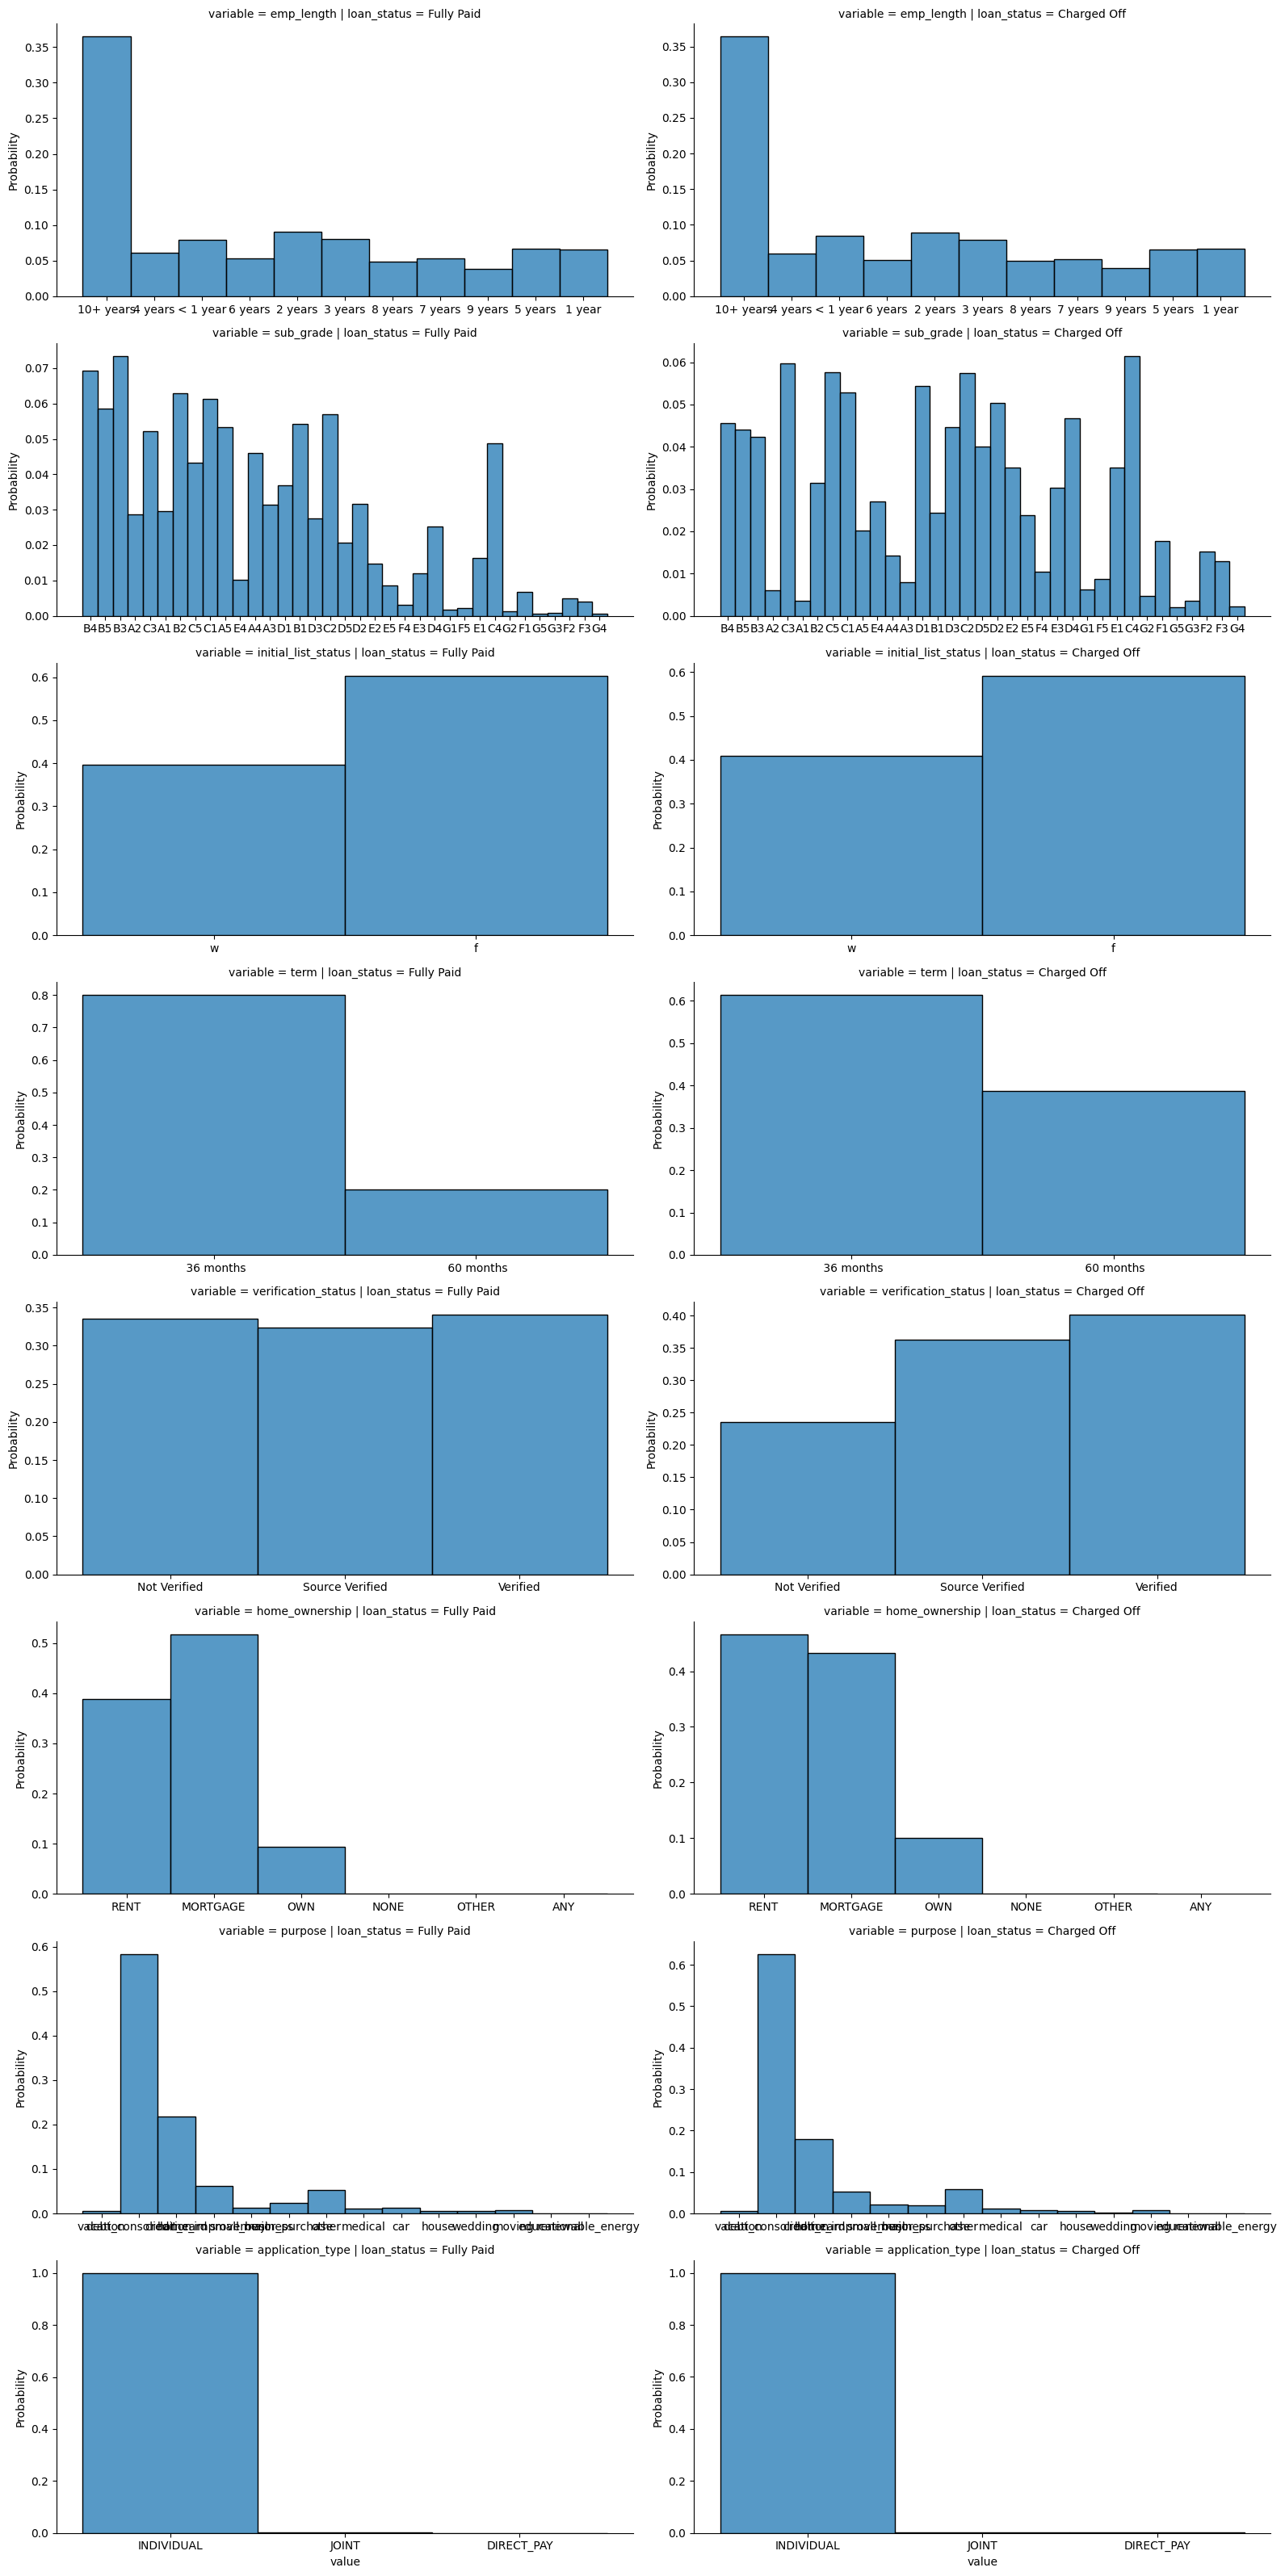

In [51]:
#for type = object

# emplength = list(df['emp_length'].value_counts().index)
# conv_empl = {emplength[i]:i for i in range(len(emplength))}
# df['train_emp_length'] = df['emp_length'].apply(conv_empl.get) # Tranform Data

# Visualization('train_emp_length')

# subgrade = list(df['sub_grade'].value_counts().index)
# conv_sg = {subgrade[i]:i for i in range(len(subgrade))}
# df['train_sub_grade'] = df['sub_grade'].apply(conv_sg.get) # Tranform Data

# Visualization('train_sub_grade')

Visualization(['emp_length','sub_grade','initial_list_status','term','verification_status','home_ownership','purpose','application_type'])


## Prepare data

In [52]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [53]:
df['train_term'] = df['term'].str[:3].astype(int)

df['train_term'].value_counts()

36    302005
60     94025
Name: train_term, dtype: int64

In [54]:
def data_tran(col):
  l = list(df[col].value_counts().index)
  conv_l = {l[i]:i for i in range(len(l))}
  df['train_'+col] = df[col].apply(conv_l.get)

In [55]:
column_list = ['emp_length','sub_grade','verification_status','loan_status','home_ownership','purpose','initial_list_status','application_type','loan_status']
for i in column_list:
  data_tran(i)

In [56]:
df['train_sub_grade'].value_counts()

0     26655
1     25601
2     23662
3     22580
4     22495
5     22085
6     21221
7     20280
8     19182
9     18526
10    18244
11    15993
12    15789
13    13951
14    12223
15    11657
16    10576
17     9729
18     9700
19     9567
20     7917
21     7431
22     6207
23     5361
24     4572
25     3536
26     2766
27     2286
28     1787
29     1397
30     1058
31      754
32      552
33      374
34      316
Name: train_sub_grade, dtype: int64

In [ ]:
df['train_verification_status'].value_counts()

0    139563
1    131385
2    125082
Name: train_verification_status, dtype: int64

In [ ]:
df['train_loan_status'].value_counts()

0    318357
1     77673
Name: train_loan_status, dtype: int64

In [ ]:
df['train_home_ownership'].value_counts()

0    198348
1    159790
2     37746
3       112
4        31
5         3
Name: train_home_ownership, dtype: int64

In [ ]:
df['train_purpose'].value_counts()

0     234507
1      83019
2      24030
3      21185
4       8790
5       5701
6       4697
7       4196
8       2854
9       2452
10      2201
11      1812
12       329
13       257
Name: train_purpose, dtype: int64

In [ ]:
df['train_initial_list_status'].value_counts()

0    238066
1    157964
Name: train_initial_list_status, dtype: int64

In [ ]:
df['train_application_type'].value_counts()

0    395319
1       425
2       286
Name: train_application_type, dtype: int64

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'train_term', 'train_emp_length',
       'train_grade', 'train_sub_grade', 'train_verification_status',
       'train_loan_status', 'train_home_ownership', 'train_purpose',
       'train_initial_list_status', 'train_application_type'],
      dtype='object')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,train_term,train_emp_length,train_grade,train_sub_grade,train_verification_status,train_loan_status,train_home_ownership,train_purpose,train_initial_list_status,train_application_type
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,36,0,0,1,2,0,1,9,1,0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,36,6,0,5,2,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,36,2,0,0,1,0,1,1,0,0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,36,7,2,19,2,0,1,1,0,0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,60,10,1,10,0,1,0,1,0,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [58]:
column_drop = column_list+['term']+['train_loan_status']

x = df.drop(column_drop, axis=1)
y = df.train_loan_status

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  396030 non-null  float64
 1   int_rate                   396030 non-null  float64
 2   installment                396030 non-null  float64
 3   annual_inc                 396030 non-null  float64
 4   dti                        396030 non-null  float64
 5   open_acc                   396030 non-null  float64
 6   pub_rec                    396030 non-null  float64
 7   revol_bal                  396030 non-null  float64
 8   revol_util                 396030 non-null  float64
 9   total_acc                  396030 non-null  float64
 10  mort_acc                   396030 non-null  float64
 11  pub_rec_bankruptcies       396030 non-null  float64
 12  train_term                 396030 non-null  int64  
 13  train_emp_length           39

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 77)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state = 77, test_size=0.5)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_test

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,pub_rec_bankruptcies,train_term,train_emp_length,train_grade,train_sub_grade,train_verification_status,train_home_ownership,train_purpose,train_initial_list_status,train_application_type
197458,17500.0,20.49,468.43,40000.0,27.36,9.0,0.0,13482.0,77.0,29.0,...,0.0,60,0,4,20,1,0,0,0,0
328022,10500.0,14.16,359.69,37024.0,22.11,11.0,0.0,8637.0,58.0,21.0,...,0.0,36,0,1,3,1,0,0,0,0
395689,24000.0,21.99,662.72,87768.0,18.19,28.0,0.0,12431.0,21.5,45.0,...,0.0,60,0,4,24,1,1,4,1,0
348525,5375.0,16.20,189.51,75000.0,13.23,9.0,1.0,7685.0,96.1,30.0,...,1.0,36,6,1,7,0,0,1,0,0
29323,35000.0,16.99,869.66,132220.0,6.54,18.0,0.0,13561.0,21.0,48.0,...,0.0,60,2,3,11,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127790,20000.0,12.69,451.90,50000.0,22.40,10.0,0.0,5142.0,22.5,17.0,...,0.0,60,8,1,3,2,0,0,0,0
123532,21000.0,7.49,653.14,47300.0,33.80,19.0,0.0,12977.0,18.3,63.0,...,0.0,36,6,2,12,0,0,1,1,0
342894,10000.0,10.16,323.43,80000.0,19.31,10.0,0.0,9847.0,39.3,15.0,...,0.0,36,5,0,8,2,1,0,0,0
37907,12000.0,13.35,275.20,65000.0,11.95,9.0,0.0,9387.0,53.9,27.0,...,0.0,60,0,1,3,2,0,0,0,0


The data is imbalance therefore we should choose f1 score for model evaluation.

In [60]:
MaxEnt_Model = LogisticRegression()
param_grid ={'C':[100,10,1,0.1,0.01]}
clf = GridSearchCV(MaxEnt_Model, param_grid,cv = 5, scoring = 'f1', verbose = 10)

In [61]:
clf.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=100.......................................................
[CV 1/5; 1/5] END ........................C=100;, score=0.112 total time=   0.7s
[CV 2/5; 1/5] START C=100.......................................................
[CV 2/5; 1/5] END ........................C=100;, score=0.119 total time=   0.8s
[CV 3/5; 1/5] START C=100.......................................................
[CV 3/5; 1/5] END ........................C=100;, score=0.116 total time=   0.8s
[CV 4/5; 1/5] START C=100.......................................................
[CV 4/5; 1/5] END ........................C=100;, score=0.108 total time=   0.8s
[CV 5/5; 1/5] START C=100.......................................................
[CV 5/5; 1/5] END ........................C=100;, score=0.112 total time=   0.8s
[CV 1/5; 2/5] START C=10........................................................
[CV 1/5; 2/5] END .........................C=10;,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]}, scoring='f1',
             verbose=10)

In [62]:
model1 = clf.best_estimator_
cvs = cross_val_score(model1,x_val_scaled,y_val) # Cheach Accuracy
cvs

array([0.80002525, 0.80330766, 0.8001515 , 0.79949495, 0.80126263])

In [63]:
clf.best_params_

{'C': 100}

In [64]:
y_val_pred_maxent = model1.predict(x_val_scaled)

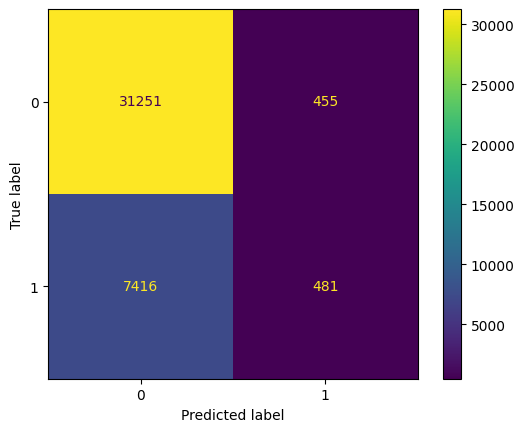

In [65]:
cm = mt.confusion_matrix(y_val,y_val_pred_maxent)
disp = mt.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
param_grid = {'n_estimators' : [10, 100, 150], 'max_features' : ['sqrt','log2']}
clf = GridSearchCV(RF_model, param_grid,cv = 5, scoring = 'f1', verbose = 10)

In [73]:
clf.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_features=sqrt, n_estimators=10..........................
[CV 1/5; 1/6] END max_features=sqrt, n_estimators=10;, score=0.166 total time=   8.1s
[CV 2/5; 1/6] START max_features=sqrt, n_estimators=10..........................
[CV 2/5; 1/6] END max_features=sqrt, n_estimators=10;, score=0.166 total time=   8.6s
[CV 3/5; 1/6] START max_features=sqrt, n_estimators=10..........................
[CV 3/5; 1/6] END max_features=sqrt, n_estimators=10;, score=0.160 total time=   8.9s
[CV 4/5; 1/6] START max_features=sqrt, n_estimators=10..........................
[CV 4/5; 1/6] END max_features=sqrt, n_estimators=10;, score=0.164 total time=   8.3s
[CV 5/5; 1/6] START max_features=sqrt, n_estimators=10..........................
[CV 5/5; 1/6] END max_features=sqrt, n_estimators=10;, score=0.161 total time=   8.6s
[CV 1/5; 2/6] START max_features=sqrt, n_estimators=100.........................
[CV 1/5; 2/6] END max_fe

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 150]},
             scoring='f1', verbose=10)

In [74]:
model2 = clf.best_estimator_
clf.best_params_

{'max_features': 'log2', 'n_estimators': 10}

In [75]:
cvs2 = cross_val_score(model2,x_val_scaled,y_val)
cvs2

array([0.78689559, 0.7944704 , 0.78904179, 0.79558081, 0.79267677])

In [78]:
y_val_pred_rf = model2.predict(x_val_scaled)

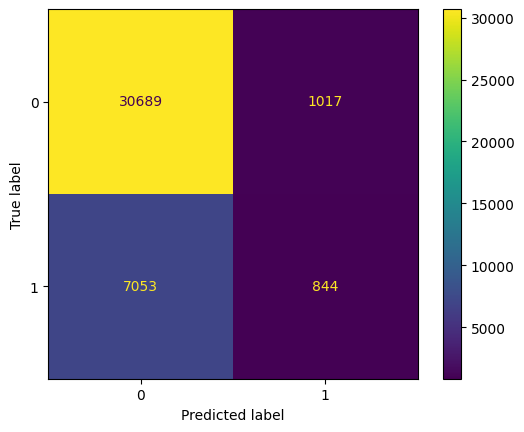

In [79]:
cm = mt.confusion_matrix(y_val,y_val_pred_rf)
disp = mt.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier
k_range = [7]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

model_M2 = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range, weights=weights, metric=metric)
clf = GridSearchCV(model_M2, param_grid,cv = 5, scoring = 'f1',verbose = 10)

In [83]:
clf.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START metric=euclidean, n_neighbors=7, weights=uniform............
[CV 1/5; 1/6] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.206 total time= 1.3min
[CV 2/5; 1/6] START metric=euclidean, n_neighbors=7, weights=uniform............
[CV 2/5; 1/6] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.207 total time= 1.3min
[CV 3/5; 1/6] START metric=euclidean, n_neighbors=7, weights=uniform............
[CV 3/5; 1/6] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.204 total time= 1.3min
[CV 4/5; 1/6] START metric=euclidean, n_neighbors=7, weights=uniform............
[CV 4/5; 1/6] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.204 total time= 1.3min
[CV 5/5; 1/6] START metric=euclidean, n_neighbors=7, weights=uniform............
[CV 5/5; 1/6] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.198 total time= 1.3min
[CV 1/5; 2/6] START metric=euclidea

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=10)

จริง ๆ คือผมเทรนตั้งแต่ k = 1 - 21 ช่วงอาทิตก่อน แต่ผมแก้ใหม่เลยไม่อยากทรนใหม่ เลยเทรนแค่ 7 พอคับ

In [84]:
model3 = clf.best_estimator_
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [85]:
cvs3 = cross_val_score(model3,x_val_scaled,y_val)
cvs3

array([0.78651685, 0.78942053, 0.7847494 , 0.78068182, 0.78598485])

In [86]:
y_val_pred_knn = model3.predict(x_val_scaled)

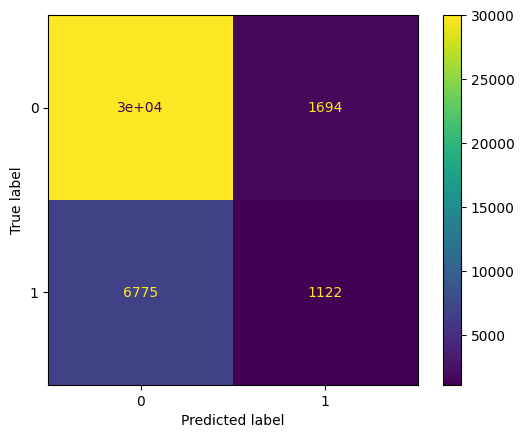

In [87]:
cm = mt.confusion_matrix(y_val,y_val_pred_knn)
disp = mt.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [88]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 316824 entries, 275577 to 178903
Series name: train_loan_status
Non-Null Count   Dtype
--------------   -----
316824 non-null  int64
dtypes: int64(1)
memory usage: 4.8 MB


In [89]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# credit : ChatGPT

# Define the sampling strategies for SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.7)

# Create the pipeline with SMOTE and RandomUnderSampler steps
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to balance the training set
x_train_balance, y_train_balance = pipeline.fit_resample(x_train_scaled, y_train)


In [90]:
from collections import Counter
Counter(y_train_balance)

Counter({0: 145595, 1: 101917})

In [93]:
clf = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric = 'manhattan')
clf.fit(x_train_balance, y_train_balance)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [98]:
model4 = clf

In [99]:
cvs4 = cross_val_score(model4,x_val_scaled,y_val)
cvs4

array([0.78651685, 0.78942053, 0.7847494 , 0.78068182, 0.78598485])

In [104]:
y_val_pred_knn4 = model4.predict(x_val_scaled)

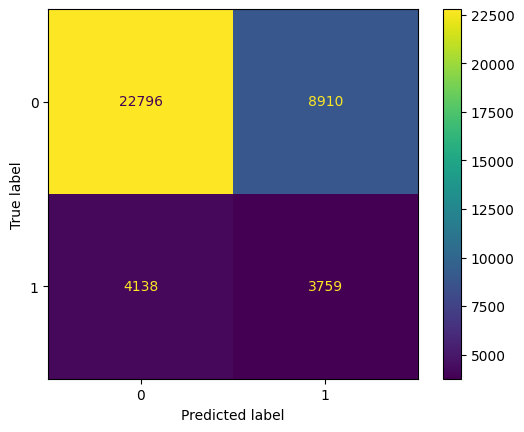

In [105]:
cm = mt.confusion_matrix(y_val,y_val_pred_knn4)
disp = mt.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [106]:
from sklearn.metrics import f1_score
print(f1_score(y_val,y_val_pred_maxent))
print(f1_score(y_val,y_val_pred_rf))
print(f1_score(y_val,y_val_pred_knn))
print(f1_score(y_val,y_val_pred_knn4))

0.10890977018000679
0.1729862676778028
0.20946513581629794
0.36555479918311773


In [107]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'train_term', 'train_emp_length',
       'train_sub_grade', 'train_verification_status', 'train_loan_status',
       'train_home_ownership', 'train_purpose', 'train_initial_list_status',
       'train_application_type'],
      dtype='object')

In [117]:
x_train.train_emp_length

275577    9
34804     0
290166    0
31323     4
63277     3
         ..
138904    2
107813    0
215275    7
74335     1
178903    1
Name: train_emp_length, Length: 316824, dtype: int64

In [114]:
df['emp_length'].value_counts().index

Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object')

In [115]:
df.emp_length.head()

0    10+ years
1      4 years
2     < 1 year
3      6 years
4      9 years
Name: emp_length, dtype: object

In [116]:
emplength = list(df['emp_length'].value_counts().index)
conv_empl = {emplength[i]:i for i in [10,2,0,3,5,1,4,6,7,8,9]}

x_train['train_emp_length'] = df['emp_length'].apply(conv_empl.get) # Tranform Data

In [119]:
x_train[['loan_amnt','installment','total_acc','annual_inc','revol_bal','pub_rec', 'mort_acc', 'pub_rec_bankruptcies']] = x_train[['loan_amnt','installment','total_acc','annual_inc','revol_bal','pub_rec', 'mort_acc', 'pub_rec_bankruptcies']].apply(lambda x : np.log(x+1))
x_test[['loan_amnt','installment','total_acc','annual_inc','revol_bal','pub_rec', 'mort_acc', 'pub_rec_bankruptcies']] = x_test[['loan_amnt','installment','total_acc','annual_inc','revol_bal','pub_rec', 'mort_acc', 'pub_rec_bankruptcies']].apply(lambda x : np.log(x+1))
x_val[['loan_amnt','installment','total_acc','annual_inc','revol_bal','pub_rec', 'mort_acc', 'pub_rec_bankruptcies']] = x_val[['loan_amnt','installment','total_acc','annual_inc','revol_bal','pub_rec', 'mort_acc', 'pub_rec_bankruptcies']].apply(lambda x : np.log(x+1))

In [120]:
scaler_new = StandardScaler()

x_train_scaled_new = scaler_new.fit_transform(x_train)
x_val_scaled_new = scaler_new.transform(x_val)
x_test_scaled_new = scaler_new.transform(x_test)

In [121]:
# Define the sampling strategies for SMOTE and RandomUnderSampler
over_new = SMOTE(sampling_strategy=0.4)
under_new = RandomUnderSampler(sampling_strategy=0.7)

# Create the pipeline with SMOTE and RandomUnderSampler steps
steps_new = [('o', over), ('u', under)]
pipeline_new = Pipeline(steps=steps_new)

# Apply the pipeline to balance the training set
x_train_balance_new, y_train_balance_new = pipeline_new.fit_resample(x_train_scaled_new, y_train)


In [123]:
clf = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric = 'manhattan')
clf.fit(x_train_balance_new, y_train_balance_new)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [126]:
model5 = clf

In [127]:
y_val_pred_knn5 = model5.predict(x_val_scaled_new)

In [130]:
y_val_pred_knn5 = y_val_pred_rf5

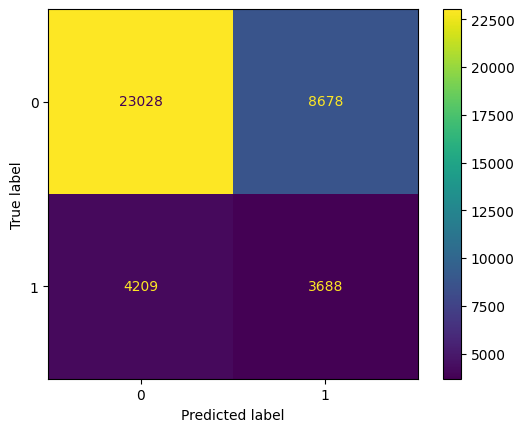

In [128]:
cm = mt.confusion_matrix(y_val,y_val_pred_rf5)
disp = mt.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [131]:
print(f1_score(y_val,y_val_pred_knn5))

0.36401322607708636


<font color='Orange'>Plot ROC curves and precision-recall curves to compare the models.

In [134]:
model = [model1,model2,model3,model4,model5]

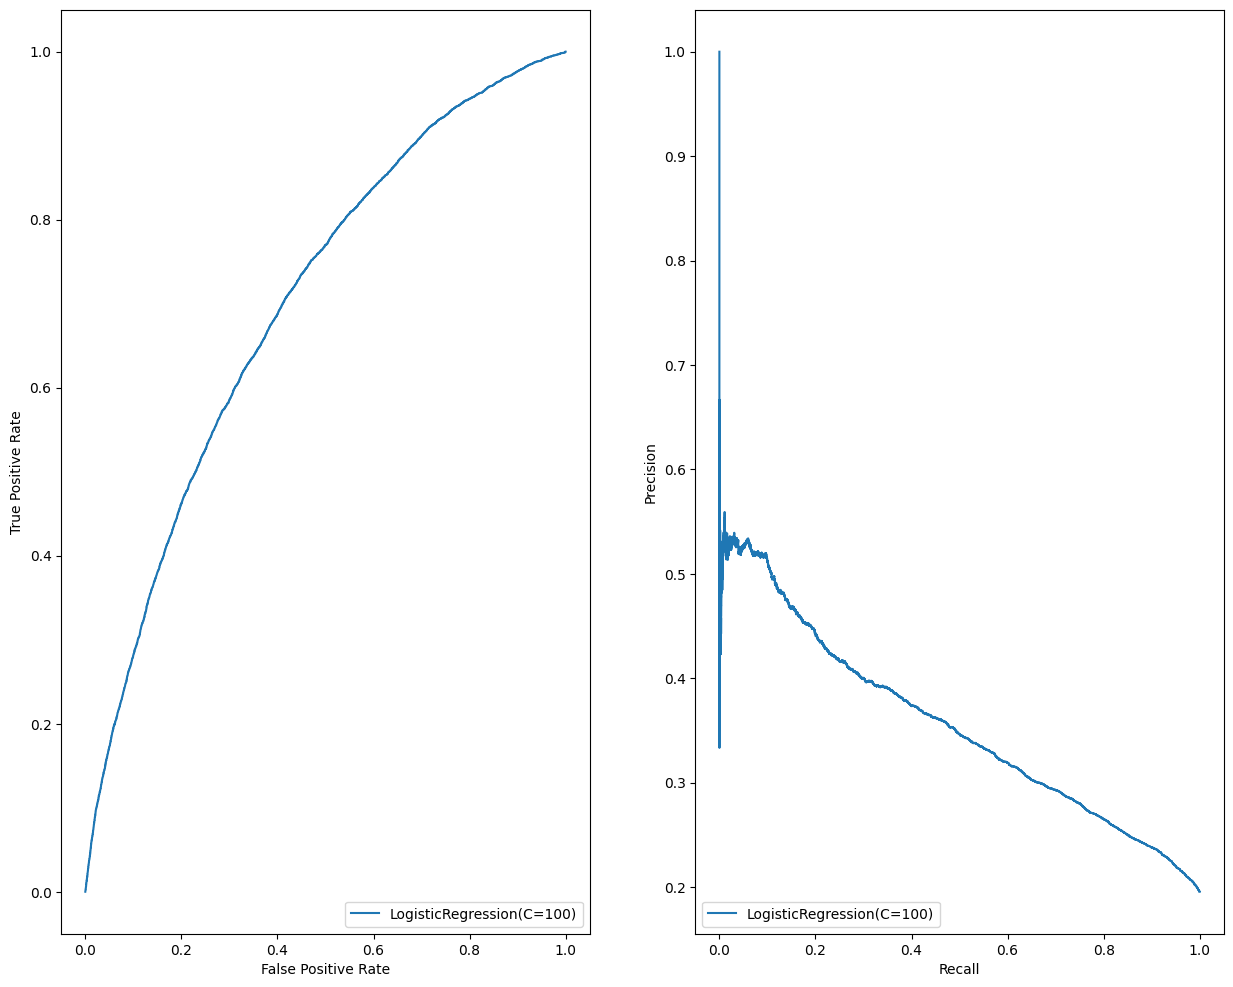

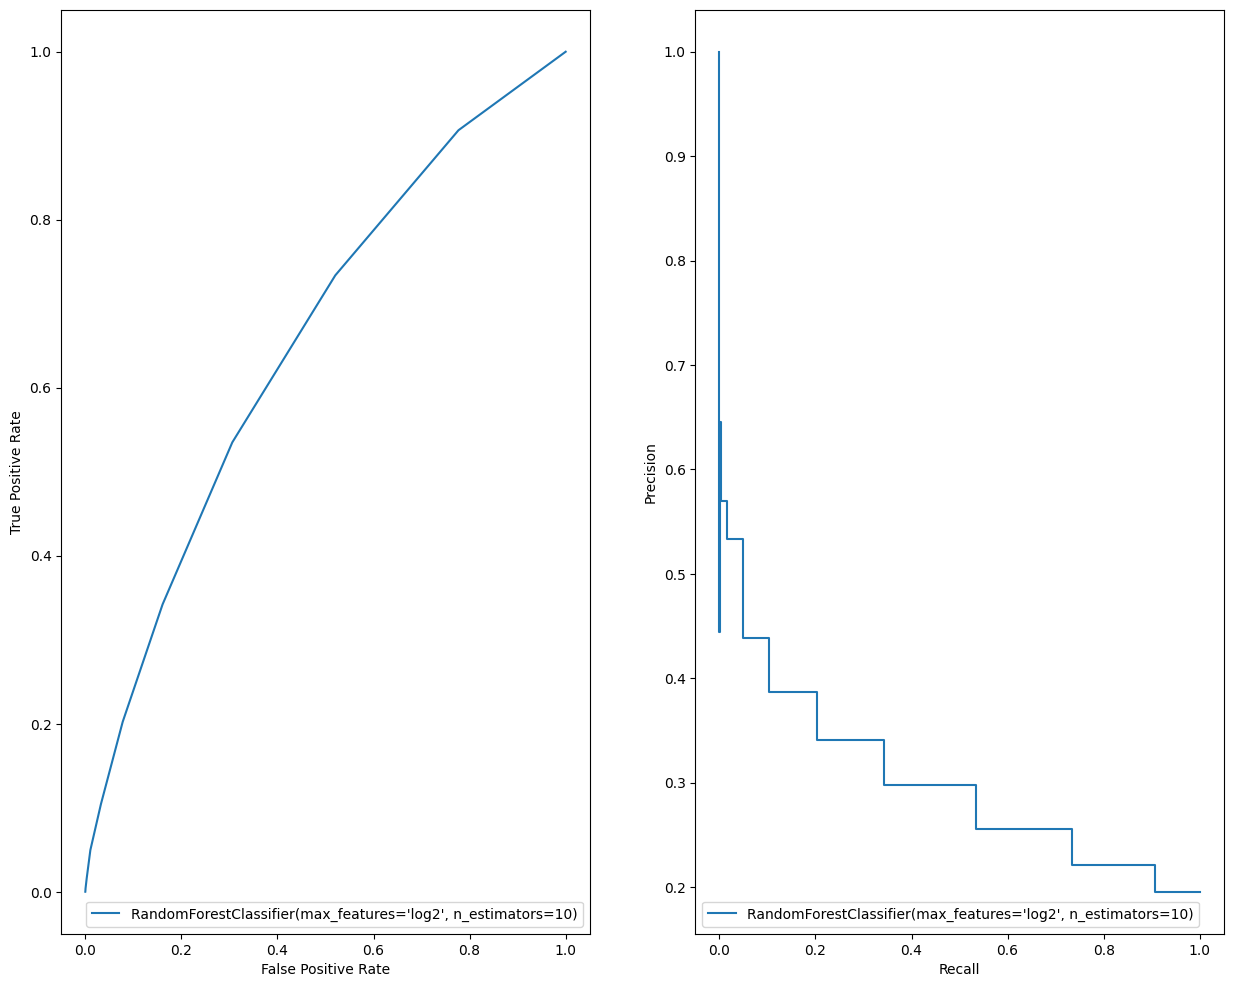

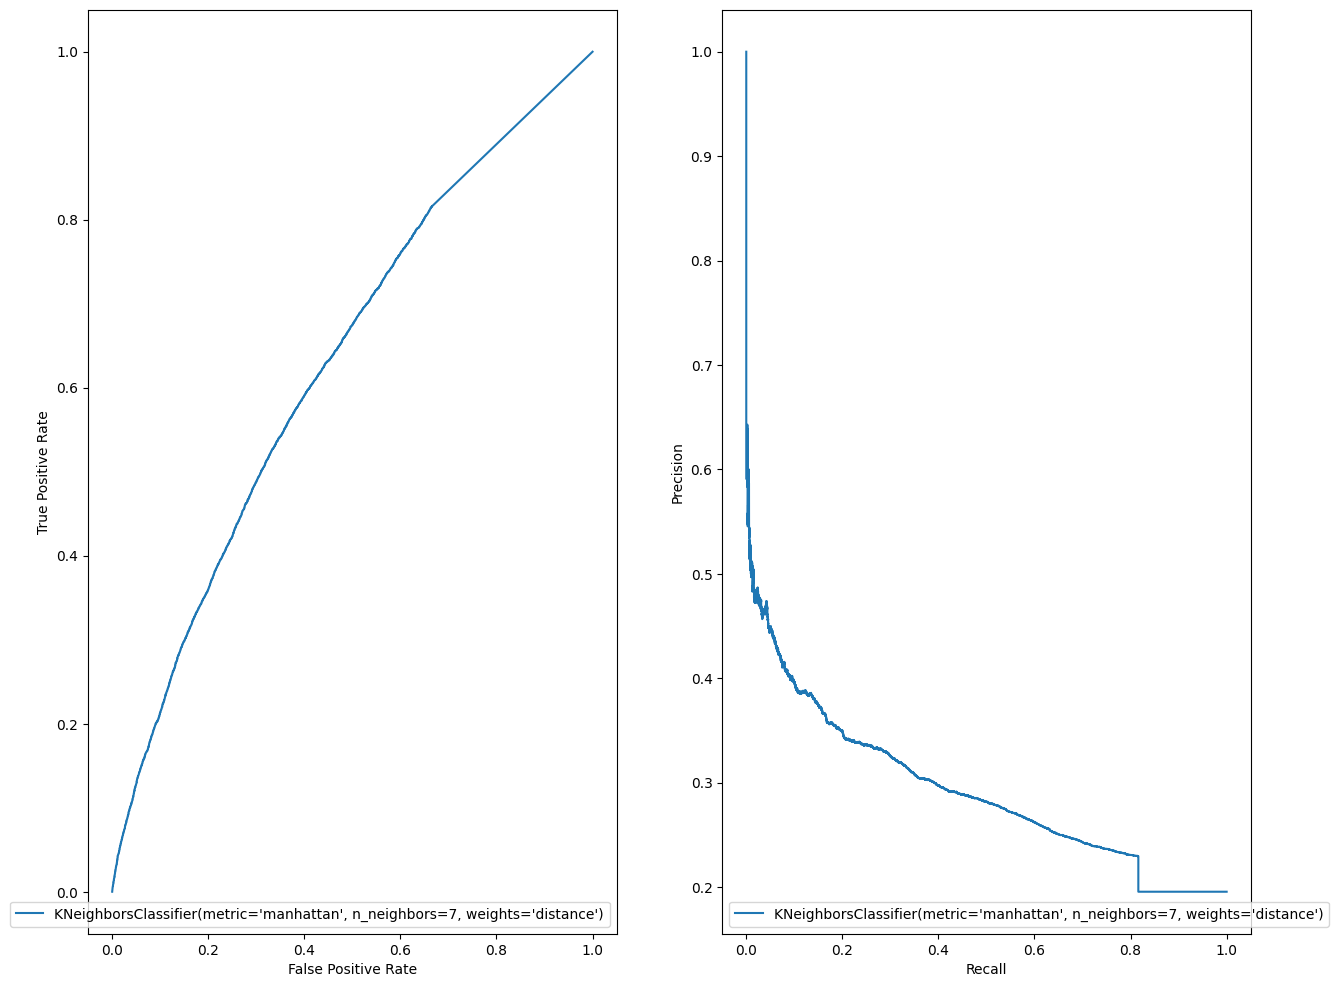

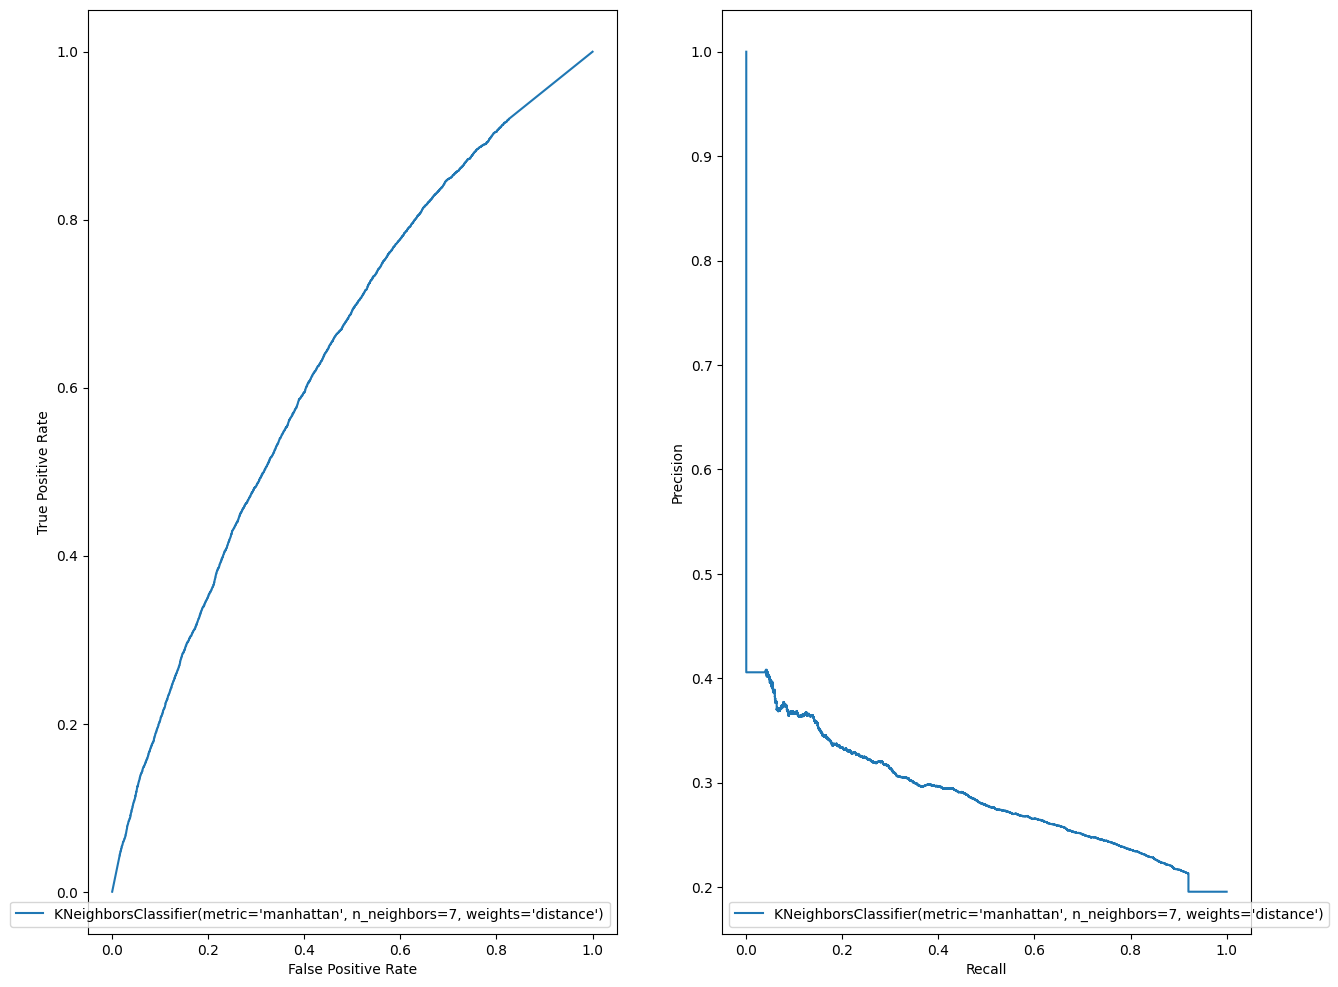

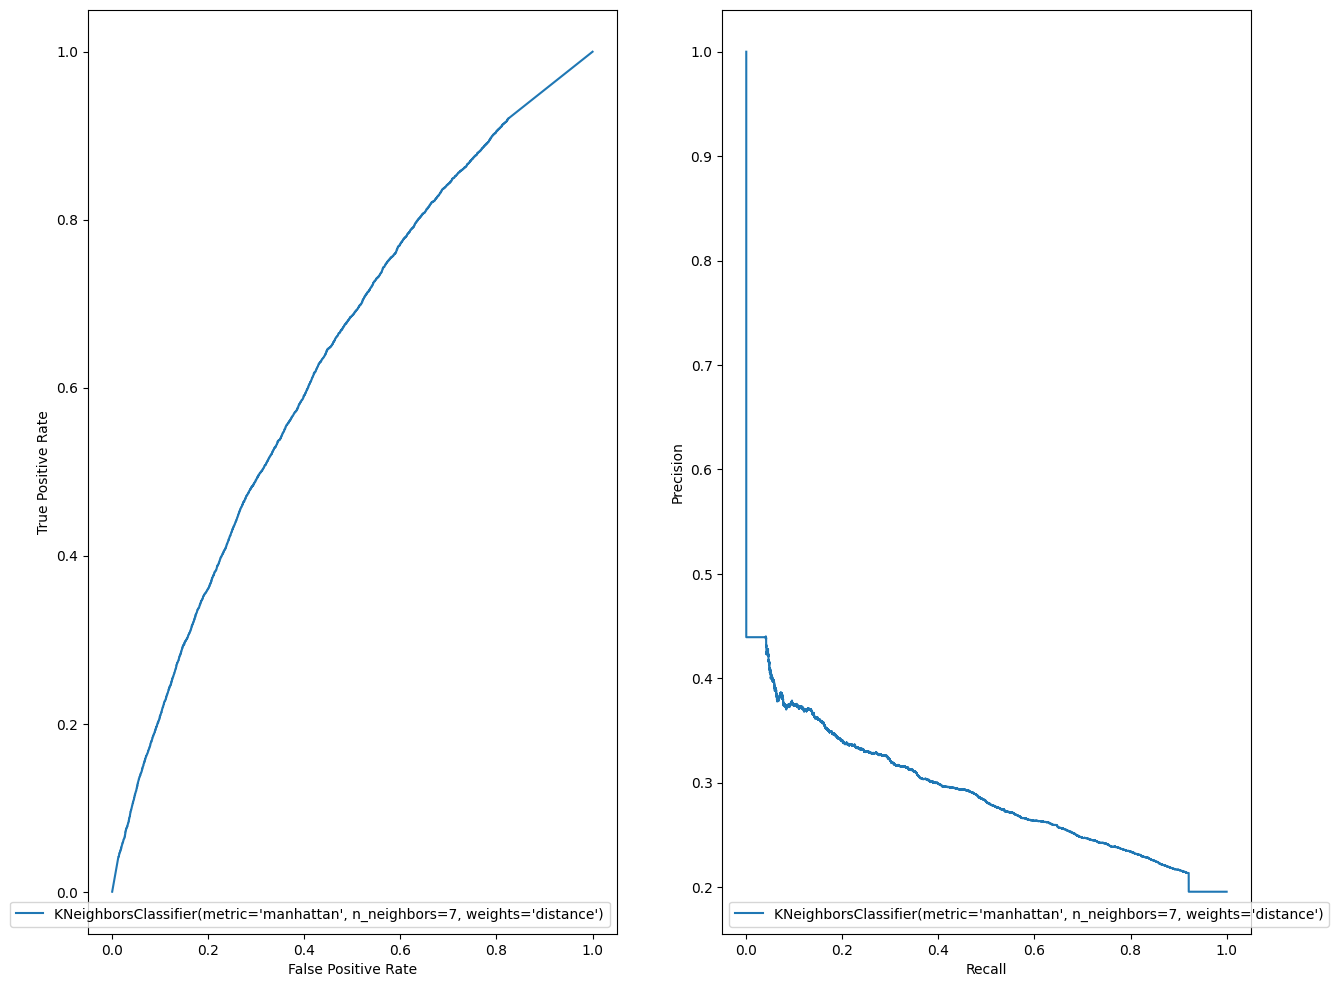

In [157]:
for i in model:

  y_score = i.predict_proba(x_test_scaled)[::,1]
  fpr, tpr, _ = mt.roc_curve(y_test, y_score)
  roc_display = mt.RocCurveDisplay(fpr=fpr, tpr=tpr)

  prec, recall, _ = mt.precision_recall_curve(y_test, y_score)
  pr_display = mt.PrecisionRecallDisplay(precision=prec, recall=recall)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12))

  roc_display.plot(ax=ax1, name = str(i))
  pr_display.plot(ax=ax2, name = str(i))
  plt.show()

<font color='Orange'>Find a best model for prediction.

In [132]:
print(f1_score(y_val,y_val_pred_maxent))
print(f1_score(y_val,y_val_pred_rf))
print(f1_score(y_val,y_val_pred_knn))
print(f1_score(y_val,y_val_pred_knn4))
print(f1_score(y_val,y_val_pred_knn5))

0.10890977018000679
0.1729862676778028
0.20946513581629794
0.36555479918311773
0.36401322607708636


model4 is the best model, it is kNN Model and have parameter k = 7, metric = manhattan, weight = distance

f-1 score at 36.40

<font color='Orange'>Find feature importance in this dataset.

In [ ]:
model_test = LogisticRegression()
model_test.fit(x_train_balance_new,y_train_balance_new)

LogisticRegression()

In [ ]:
model_test.coef_

array([[-0.06144179,  0.45062953,  0.17493349, -0.23937239,  0.19529114,
         0.14625579, -0.09586171,  0.12235156, -0.11544857,  0.25158368,
        -0.01667727,  0.13525221, -0.16642026, -0.02801385,  0.08931228,
         0.00355796,  0.03669949, -0.0253724 ]])

In [ ]:
x_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,train_term,train_emp_length,train_grade,train_sub_grade,train_verification_status,train_home_ownership,train_purpose,train_initial_list_status,train_application_type
339881,10500.0,19.72,388.73,10.308986,25.14,6.0,9.991178,97.0,2.397895,36,2,3,18,1,2,0,0,0
134266,11000.0,13.11,371.20,11.552156,11.88,15.0,9.173469,46.7,3.806662,36,6,1,3,2,0,0,0,0
52251,7500.0,5.42,226.20,11.289794,5.54,9.0,8.871505,16.8,3.218876,36,6,2,17,1,1,0,0,0
173331,10500.0,6.03,319.58,11.571204,16.73,19.0,10.034165,25.2,3.713572,36,6,2,17,2,1,1,1,0
288890,24000.0,6.49,735.47,11.561725,8.46,7.0,10.494491,57.7,3.218876,36,0,2,19,1,0,1,0,0


If we look at weight parameter of model, May be int_rate, annual_inc, term, dti, sub_grade, vertification_status are importance.

